# Question 1 - Linear Regression

## Created by Aiden Seay - CS 599 (Deep Learning)

### Notebook Setup

In [1]:
"""
Import necessary packages
"""

# necessary imports
import tensorflow as tf
import matplotlib.pyplot as plt
from line_reg_utilities import *

"""
Complete checks to ensure status of TensorFlow
"""

# ensure eager execution
print("Eager execution:", tf.executing_eagerly())

# check if GPU is available on system
device_name = tf.config.list_physical_devices("GPU")

if(device_name):
    print(f"GPU Available: {device_name}")
else:
    print("CPU Only")

2025-10-05 10:36:32.565845: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759685792.592843  123539 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759685792.613992  123539 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Eager execution: True
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### Running Different Models

#### Testing Loss Functions

Running model on /CPU:0 with Seed: 123456


I0000 00:00:1759685797.629966  123539 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4572 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5


Weight: 1.6255512237548828, Bias: 1.3245270252227783, Time: 5.605791091918945, Final Loss: 1.3413835763931274
Running model on /CPU:0 with Seed: 123456
Weight: 2.6084444522857666, Bias: 1.8361318111419678, Time: 4.674482583999634, Final Loss: 1.0431467294692993
Running model on /CPU:0 with Seed: 123456
Weight: 2.329362392425537, Bias: 1.692416787147522, Time: 5.888875961303711, Final Loss: 1.1119015216827393


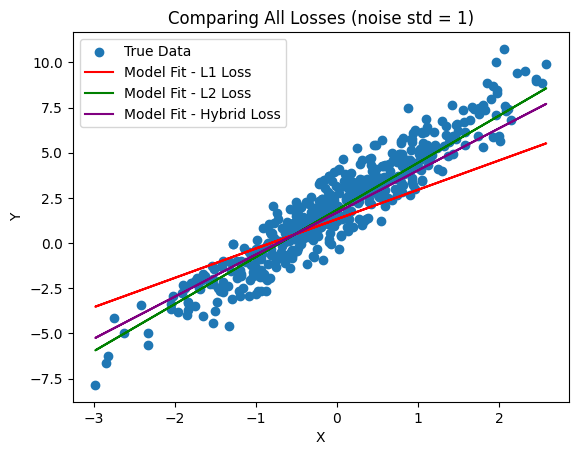

In [2]:
# run the model to test different loss functions

"""
Run Model Output Key:
0 - weight
1 - bias
2 - total_time
3 - train_steps
4 - y_pred
5 - y_true
6 - x_true
7 - losses
"""

model_1 = run_model(l1_loss,
                    learning_rate = 0.001,
                    train_steps = 1000,
                    init_weight = 1.0,
                    init_bias = 1.0,
                    patience_lim = 50,
                    noise_std = 1.0,
                    weight_noise = 0.0,
                    lr_noise = 0.0,
                    seed = 123456,
                    device = "/CPU:0")

model_2 = run_model(l2_loss,
                    learning_rate = 0.001,
                    train_steps = 1000,
                    init_weight = 1.0,
                    init_bias = 1.0,
                    patience_lim = 50,
                    noise_std = 1.0,
                    weight_noise = 0.0,
                    lr_noise = 0.0,
                    seed = 123456,
                    device = "/CPU:0")

model_3 = run_model(hybrid_loss,
                    learning_rate = 0.001,
                    train_steps = 1000,
                    init_weight = 1.0,
                    init_bias = 1.0,
                    patience_lim = 50,
                    noise_std = 1.0,
                    weight_noise = 0.0,
                    lr_noise = 0.0,
                    seed = 123456,
                    device = "/CPU:0")

# plot the true data
plt.scatter(model_1[6], model_1[5], label= "True Data")

# plot the L1 loss linear regression line
plt.plot(model_1[6], y_prediction(model_1[0], model_1[6], model_1[1]), 
         label = "Model Fit - L1 Loss", color = "red")

# plot the L2 loss linear regression line
plt.plot(model_2[6], y_prediction(model_2[0], model_2[6], model_2[1]), 
         label = "Model Fit - L2 Loss", color = "green")

# plot the Hybrid loss linear regression line
plt.plot(model_3[6], y_prediction(model_3[0], model_3[6], model_3[1]), 
         label = "Model Fit - Hybrid Loss", color = "purple")

plt.title(f"Comparing All Losses (noise std = 1)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


#### Testing Learning Rates

Running model with learning rate = 1e-05
Running model on /GPU:0 with Seed: 123456


W0000 00:00:1759685814.737451  123539 gpu_backend_lib.cc:579] Can't find libdevice directory ${CUDA_DIR}/nvvm/libdevice. This may result in compilation or runtime failures, if the program we try to run uses routines from libdevice.
Searched for CUDA in the following directories:
  ./cuda_sdk_lib
  ipykernel_launcher.runfiles/cuda_nvcc
  ipykern/cuda_nvcc
  
  /usr/local/cuda
  /home/aiden/.conda/envs/CS599/lib/python3.11/site-packages/tensorflow/python/platform/../../../nvidia/cuda_nvcc
  /home/aiden/.conda/envs/CS599/lib/python3.11/site-packages/tensorflow/python/platform/../../../../nvidia/cuda_nvcc
  /home/aiden/.conda/envs/CS599/lib/python3.11/site-packages/tensorflow/python/platform/../../cuda
  .
You can choose the search directory by setting xla_gpu_cuda_data_dir in HloModule's DebugOptions.  For most apps, setting the environment variable XLA_FLAGS=--xla_gpu_cuda_data_dir=/path/to/cuda will work.


Weight: 1.036657452583313, Bias: 1.0188813209533691, Time: 6.414144515991211, Final Loss: 5.167128086090088
Running model with learning rate = 0.0001
Running model on /GPU:0 with Seed: 123456
Weight: 1.3357957601547241, Bias: 1.1731637716293335, Time: 6.199950695037842, Final Loss: 3.906191110610962
Running model with learning rate = 0.001
Running model on /GPU:0 with Seed: 123456
Weight: 2.6084444522857666, Bias: 1.8361318111419678, Time: 5.120868921279907, Final Loss: 1.0431466102600098
Running model with learning rate = 0.01
Running model on /GPU:0 with Seed: 123456
Weight: 2.863496780395508, Bias: 1.9728015661239624, Time: 5.569350242614746, Final Loss: 0.9598389863967896
Running model with learning rate = 0.1
Running model on /GPU:0 with Seed: 123456
Weight: 2.863584280014038, Bias: 1.9728498458862305, Time: 6.52366304397583, Final Loss: 0.9598389267921448
Running model with learning rate = 1.0
Running model on /GPU:0 with Seed: 123456
Weight: 2.8635847568511963, Bias: 1.972850084

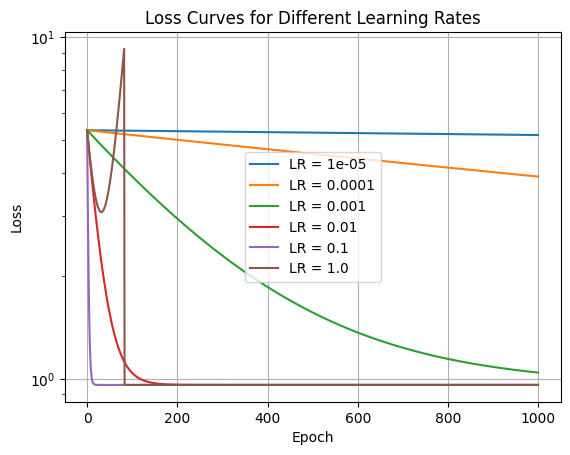

In [3]:
# run the model to test different learning rates

"""
Run Model Output Key:
0 - weight
1 - bias
2 - total_time
3 - train_steps
4 - y_pred
5 - y_true
6 - x_true
7 - losses
"""

# define the learning rates to test
learning_rates = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0]
results = {}

# iterate through different learning rates
for test_lr in learning_rates:
    print(f"Running model with learning rate = {test_lr}")
    results[test_lr] = run_model(
                                 l2_loss,
                                 learning_rate = test_lr,
                                 train_steps = 1000,
                                 init_weight = 1.0,
                                 init_bias = 1.0,
                                 patience_lim = 50,
                                 noise_std = 1.0,
                                 weight_noise = 0.0,
                                 lr_noise = 0.0,
                                 seed = 123456,
                                 device = "/GPU:0"
                                )

# plot each loss curve
for model_lr, model_output in results.items():
    plt.plot(model_output[7], label = f"LR = {model_lr}")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curves for Different Learning Rates")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.show()

#### Testing Learning Duration

Running model with learning duration = 100
Running model on /GPU:0 with Seed: 123456
Weight: 1.336066722869873, Bias: 1.1733019351959229, Time: 0.5607705116271973, Final Loss: 3.9156839847564697
Running model with learning duration = 150
Running model on /GPU:0 with Seed: 123456
Weight: 1.4806383848190308, Bias: 1.248010516166687, Time: 0.8207955360412598, Final Loss: 3.3840253353118896
Running model with learning duration = 300
Running model on /GPU:0 with Seed: 123456
Weight: 1.8373075723648071, Bias: 1.4328079223632812, Time: 1.5967063903808594, Final Loss: 2.297121524810791
Running model with learning duration = 500
Running model on /GPU:0 with Seed: 123456
Weight: 2.1740636825561523, Bias: 1.608102560043335, Time: 2.4815194606781006, Final Loss: 1.5648624897003174
Running model with learning duration = 700
Running model on /GPU:0 with Seed: 123456
Weight: 2.400312900543213, Bias: 1.7265076637268066, Time: 3.9844894409179688, Final Loss: 1.2335740327835083
Running model with learni

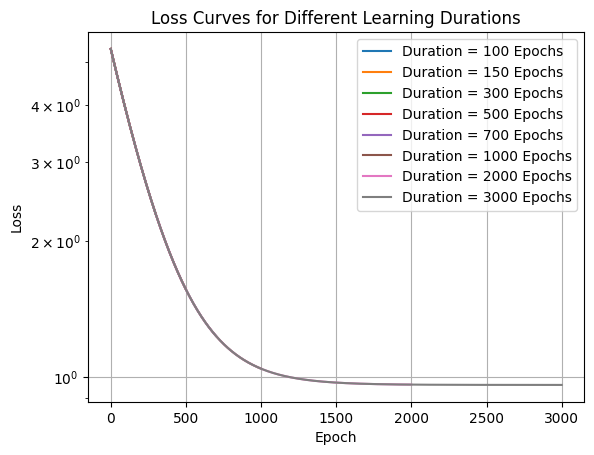

In [6]:
# run the model to test different learning durations

"""
Run Model Output Key:
0 - weight
1 - bias
2 - total_time
3 - train_steps
4 - y_pred
5 - y_true
6 - x_true
7 - losses
"""

# define the learning durations to test
learning_durs = [100, 150, 300, 500, 700, 1000, 2000, 3000]

results = {}

# iterate through different learning durations
for test_dur in learning_durs:
    print(f"Running model with learning duration = {test_dur}")
    results[test_dur] = run_model(
                                 l2_loss,
                                 learning_rate = 0.001,
                                 train_steps = test_dur,
                                 init_weight = 1.0,
                                 init_bias = 1.0,
                                 patience_lim = 50,
                                 noise_std = 1.0,
                                 weight_noise = 0.0,
                                 lr_noise = 0.0,
                                 seed = 123456,
                                 device = "/GPU:0"
                                )

# plot each loss curve
for model_dur, model_output in results.items():
    plt.plot(model_output[7], label = f"Duration = {model_dur} Epochs")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curves for Different Learning Durations")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.show()

#### Testing Weights

Running model with weight = 0.1
Running model on /GPU:0 with Seed: 123456
Weight: 2.486562728881836, Bias: 1.8335760831832886, Time: 5.497333526611328, Final Loss: 1.1207458972930908
Running model with weight = 0.5
Running model on /GPU:0 with Seed: 123456
Weight: 2.5407326221466064, Bias: 1.8347127437591553, Time: 5.527066707611084, Final Loss: 1.0825787782669067
Running model with weight = 1.0
Running model on /GPU:0 with Seed: 123456
Weight: 2.6084444522857666, Bias: 1.8361318111419678, Time: 6.4901909828186035, Final Loss: 1.0431466102600098
Running model with weight = 2.0
Running model on /GPU:0 with Seed: 123456
Weight: 2.7438712120056152, Bias: 1.8389711380004883, Time: 6.244058847427368, Final Loss: 0.9918670654296875
Running model with weight = 4.0
Running model on /GPU:0 with Seed: 123456
Weight: 3.014723539352417, Bias: 1.8446502685546875, Time: 6.9854443073272705, Final Loss: 0.9996558427810669
Running model with weight = 10.0
Running model on /GPU:0 with Seed: 123456
Weigh

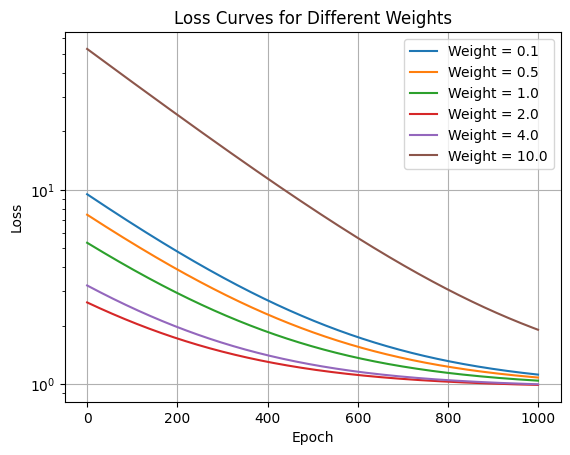

In [7]:
# run the model to test different starting weights

"""
Run Model Output Key:
0 - weight
1 - bias
2 - total_time
3 - train_steps
4 - y_pred
5 - y_true
6 - x_true
7 - losses
"""

# define the weights to test
weights = [0.1, 0.5, 1.0, 2.0, 4.0, 10.0]

results = {}

# iterate through different weights
for test_weight in weights:
    print(f"Running model with weight = {test_weight}")
    results[test_weight] = run_model(
                                 l2_loss,
                                 learning_rate = 0.001,
                                 train_steps = 1000,
                                 init_weight = test_weight,
                                 init_bias = 1.0,
                                 patience_lim = 50,
                                 noise_std = 1.0,
                                 weight_noise = 0.0,
                                 lr_noise = 0.0,
                                 seed = 123456,
                                 device = "/GPU:0"
                                )

# plot each loss curve
for model_weight, model_output in results.items():
    plt.plot(model_output[7], label = f"Weight = {model_weight}")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curves for Different Weights")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.show()

#### Testing Biases

Running model with weight = 0.1
Running model on /GPU:0 with Seed: 123456
Weight: 2.6058902740478516, Bias: 1.7145466804504395, Time: 5.970747709274292, Final Loss: 1.0920124053955078
Running model with weight = 0.5
Running model on /GPU:0 with Seed: 123456
Weight: 2.607024669647217, Bias: 1.768584132194519, Time: 6.474628925323486, Final Loss: 1.0666301250457764
Running model with weight = 1.0
Running model on /GPU:0 with Seed: 123456
Weight: 2.6084444522857666, Bias: 1.8361318111419678, Time: 6.278995990753174, Final Loss: 1.0431466102600098
Running model with weight = 2.0
Running model on /GPU:0 with Seed: 123456
Weight: 2.6112847328186035, Bias: 1.9712263345718384, Time: 6.52971339225769, Final Loss: 1.0236653089523315
Running model with weight = 4.0
Running model on /GPU:0 with Seed: 123456
Weight: 2.616964101791382, Bias: 2.24141526222229, Time: 7.387356996536255, Final Loss: 1.0946455001831055
Running model with weight = 10.0
Running model on /GPU:0 with Seed: 123456
Weight: 2.6

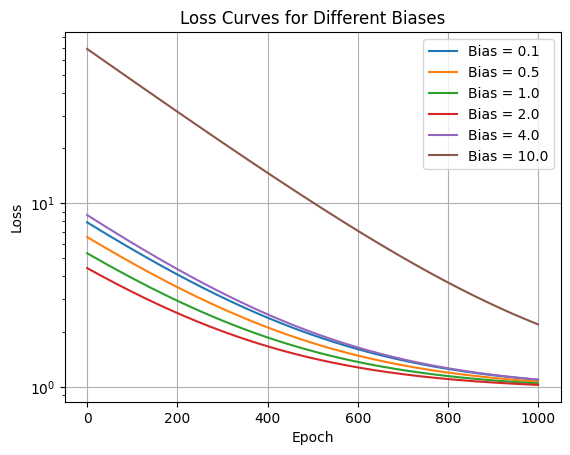


Final Losses:
Bias = 0.1 -> Final Loss = 1.0920124053955078
Bias = 0.5 -> Final Loss = 1.0666301250457764
Bias = 1.0 -> Final Loss = 1.0431466102600098
Bias = 2.0 -> Final Loss = 1.0236653089523315
Bias = 4.0 -> Final Loss = 1.0946455001831055
Bias = 10.0 -> Final Loss = 2.187120199203491


In [8]:
# run the model to test different starting bias

"""
Run Model Output Key:
0 - weight
1 - bias
2 - total_time
3 - train_steps
4 - y_pred
5 - y_true
6 - x_true
7 - losses
"""

# define the biases to test
biases = [0.1, 0.5, 1.0, 2.0, 4.0, 10.0]

results = {}

# iterate through different biases
for test_bias in biases:
    print(f"Running model with weight = {test_bias}")
    results[test_bias] = run_model(
                                 l2_loss,
                                 learning_rate = 0.001,
                                 train_steps = 1000,
                                 init_weight = 1.0,
                                 init_bias = test_bias,
                                 patience_lim = 50,
                                 noise_std = 1.0,
                                 weight_noise = 0.0,
                                 lr_noise = 0.0,
                                 seed = 123456,
                                 device = "/GPU:0"
                                )

# plot each loss curve
for model_bias, model_output in results.items():
    plt.plot(model_output[7], label = f"Bias = {model_bias}")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curves for Different Biases")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.show()

# print final loss per bias
print("\nFinal Losses:")
for bias, output in results.items():
    print(f"Bias = {bias} -> Final Loss = {output[7][-1]}")

#### Adding Noise!

Running model with weight noise = 0.0
Running model on /GPU:0 with Seed: 123456
Weight: 2.6084444522857666, Bias: 1.8361318111419678, Time: 6.045936822891235, Final Loss: 1.0431466102600098
Running model with weight noise = 0.0001
Running model on /GPU:0 with Seed: 123456
Weight: 2.6084437370300293, Bias: 1.8361320495605469, Time: 6.595170021057129, Final Loss: 1.043146014213562
Running model with weight noise = 0.001
Running model on /GPU:0 with Seed: 123456
Weight: 2.608436346054077, Bias: 1.8361321687698364, Time: 6.749924182891846, Final Loss: 1.043142557144165
Running model with weight noise = 0.01
Running model on /GPU:0 with Seed: 123456
Weight: 2.6083505153656006, Bias: 1.8361319303512573, Time: 6.421290159225464, Final Loss: 1.043114185333252
Running model with weight noise = 0.1
Running model on /GPU:0 with Seed: 123456
Weight: 2.3709042072296143, Bias: 1.7117336988449097, Time: 6.6561198234558105, Final Loss: 1.2662416696548462
Running model with weight noise = 0.5
Running m

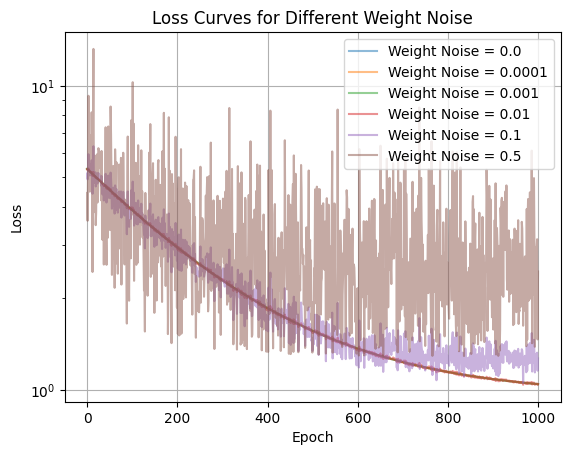


Final Losses:
Noise = 0.0 -> Final Loss = 1.0431466102600098
Noise = 0.0001 -> Final Loss = 1.043146014213562
Noise = 0.001 -> Final Loss = 1.043142557144165
Noise = 0.01 -> Final Loss = 1.043114185333252
Noise = 0.1 -> Final Loss = 1.2662416696548462
Noise = 0.5 -> Final Loss = 2.448120594024658


In [10]:
# run the model to test different noise in weights

"""
Run Model Output Key:
0 - weight
1 - bias
2 - total_time
3 - train_steps
4 - y_pred
5 - y_true
6 - x_true
7 - losses
"""

# define the weight noise to test
weight_noises = [0.0, 1e-4, 1e-3, 1e-2, 1e-1, 0.5]

results = {}

# iterate through different biases
for test_noise in weight_noises:
    print(f"Running model with weight noise = {test_noise}")
    results[test_noise] = run_model(
                                 l2_loss,
                                 learning_rate = 0.001,
                                 train_steps = 1000,
                                 init_weight = 1.0,
                                 init_bias = 1.0,
                                 patience_lim = 50,
                                 noise_std = 1.0,
                                 weight_noise = test_noise,
                                 lr_noise = 0.0,
                                 seed = 123456,
                                 device = "/GPU:0"
                                )

# plot each loss curve
for noise, model_output in results.items():
    plt.plot(model_output[7], label = f"Weight Noise = {noise}", alpha=0.5)

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curves for Different Weight Noise")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.show()

# print final loss per noise
print("\nFinal Losses:")
for noise, output in results.items():
    print(f"Noise = {noise} -> Final Loss = {output[7][-1]}")

Running model with weight noise = 0.0
Running model on /GPU:0 with Seed: 123456
Weight: 2.6084444522857666, Bias: 1.8361318111419678, Time: 6.017271995544434, Final Loss: 1.0431466102600098
Running model with weight noise = 0.0001
Running model on /GPU:0 with Seed: 123456
Weight: 2.6094751358032227, Bias: 1.8366767168045044, Time: 5.897073984146118, Final Loss: 1.0424610376358032
Running model with weight noise = 0.001
Running model on /GPU:0 with Seed: 123456
Weight: 2.6189486980438232, Bias: 1.841686725616455, Time: 5.882174015045166, Final Loss: 1.0363010168075562
Running model with weight noise = 0.01
Running model on /GPU:0 with Seed: 123456
Weight: 2.361900568008423, Bias: 1.7057245969772339, Time: 5.509199142456055, Final Loss: 1.273750901222229
Running model with weight noise = 0.1
Running model on /GPU:0 with Seed: 123456
Weight: 2.8635847568511963, Bias: 1.9728500843048096, Time: 6.357545375823975, Final Loss: 0.9598388671875
Running model with weight noise = 0.5
Running mode

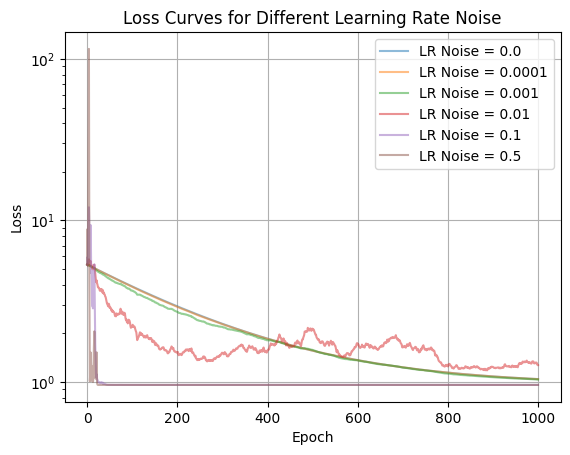


Final Losses:
Noise = 0.0 -> Final Loss = 1.0431466102600098
Noise = 0.0001 -> Final Loss = 1.0424610376358032
Noise = 0.001 -> Final Loss = 1.0363010168075562
Noise = 0.01 -> Final Loss = 1.273750901222229
Noise = 0.1 -> Final Loss = 0.9598388671875
Noise = 0.5 -> Final Loss = 0.9598388671875


In [12]:
# run the model to test different noise in lr

"""
Run Model Output Key:
0 - weight
1 - bias
2 - total_time
3 - train_steps
4 - y_pred
5 - y_true
6 - x_true
7 - losses
"""

# define the lr noise to test
lr_noises = [0.0, 1e-4, 1e-3, 1e-2, 1e-1, 0.5]

results = {}

# iterate through different biases
for test_noise in lr_noises:
    print(f"Running model with weight noise = {test_noise}")
    results[test_noise] = run_model(
                                 l2_loss,
                                 learning_rate = 0.001,
                                 train_steps = 1000,
                                 init_weight = 1.0,
                                 init_bias = 1.0,
                                 patience_lim = 50,
                                 noise_std = 1.0,
                                 weight_noise = 0.0,
                                 lr_noise = test_noise,
                                 seed = 123456,
                                 device = "/GPU:0"
                                )

# plot each loss curve
for noise, model_output in results.items():
    plt.plot(model_output[7], label = f"LR Noise = {noise}", alpha=0.5)

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curves for Different Learning Rate Noise")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.show()

# print final loss per noise
print("\nFinal Losses:")
for noise, output in results.items():
    print(f"Noise = {noise} -> Final Loss = {output[7][-1]}")

Running model with data noise = 0.0
Running model on /GPU:0 with Seed: 123456
Weight: 2.726308822631836, Bias: 1.8592256307601929, Time: 5.806613445281982, Final Loss: 0.09419825673103333
Running model with data noise = 0.0001
Running model on /GPU:0 with Seed: 123456
Weight: 2.726297378540039, Bias: 1.8592231273651123, Time: 6.870651960372925, Final Loss: 0.09419699758291245
Running model with data noise = 0.001
Running model on /GPU:0 with Seed: 123456
Weight: 2.7261908054351807, Bias: 1.8592027425765991, Time: 5.673563241958618, Final Loss: 0.09418801963329315
Running model with data noise = 0.01
Running model on /GPU:0 with Seed: 123456
Weight: 2.7251317501068115, Bias: 1.858995795249939, Time: 5.510171175003052, Final Loss: 0.09418071806430817
Running model with data noise = 0.1
Running model on /GPU:0 with Seed: 123456
Weight: 2.7145228385925293, Bias: 1.8569172620773315, Time: 5.449180364608765, Final Loss: 0.10267473012208939
Running model with data noise = 0.5
Running model on

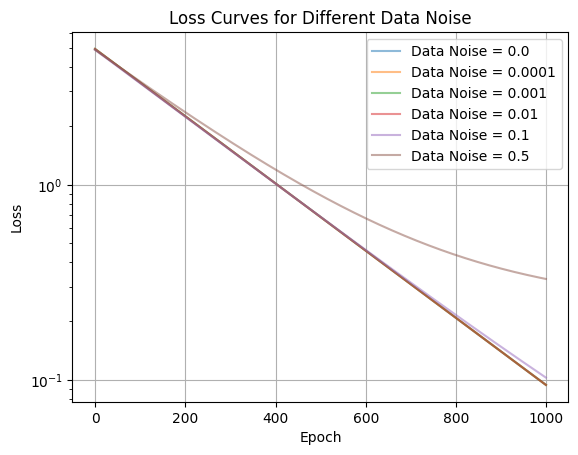


Final Losses:
Noise = 0.0 -> Final Loss = 0.09419825673103333
Noise = 0.0001 -> Final Loss = 0.09419699758291245
Noise = 0.001 -> Final Loss = 0.09418801963329315
Noise = 0.01 -> Final Loss = 0.09418071806430817
Noise = 0.1 -> Final Loss = 0.10267473012208939
Noise = 0.5 -> Final Loss = 0.3286217749118805


In [13]:
# run the model to test different noise in data 

"""
Run Model Output Key:
0 - weight
1 - bias
2 - total_time
3 - train_steps
4 - y_pred
5 - y_true
6 - x_true
7 - losses
"""

# define the data noise to test
data_noises = [0.0, 1e-4, 1e-3, 1e-2, 1e-1, 0.5]

results = {}

# iterate through different data noise
for test_noise in data_noises:
    print(f"Running model with data noise = {test_noise}")
    results[test_noise] = run_model(
                                 l2_loss,
                                 learning_rate = 0.001,
                                 train_steps = 1000,
                                 init_weight = 1.0,
                                 init_bias = 1.0,
                                 patience_lim = 50,
                                 noise_std = test_noise,
                                 weight_noise = 0.0,
                                 lr_noise = 0.0,
                                 seed = 123456,
                                 device = "/GPU:0"
                                )

# plot each loss curve
for noise, model_output in results.items():
    plt.plot(model_output[7], label = f"Data Noise = {noise}", alpha=0.5)

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curves for Different Data Noise")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.show()

# print final loss per noise
print("\nFinal Losses:")
for noise, output in results.items():
    print(f"Noise = {noise} -> Final Loss = {output[7][-1]}")

Running model on /GPU:0 with Seed: 123456
Weight: 2.851430892944336, Bias: 1.972604513168335, Time: 5.479516267776489, Final Loss: 0.9599584937095642
Running model on /GPU:0 with Seed: 123457
Weight: 2.913775682449341, Bias: 1.9381269216537476, Time: 5.580787897109985, Final Loss: 0.862966001033783


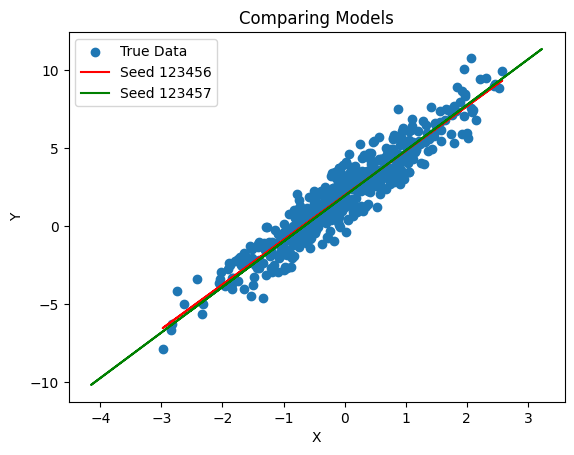

In [16]:
# different models


"""
Run Model Output Key:
0 - weight
1 - bias
2 - total_time
3 - train_steps
4 - y_pred
5 - y_true
6 - x_true
7 - losses
"""

model_1 = run_model(l2_loss,
                    learning_rate = 0.01,
                    train_steps = 1000,
                    init_weight = 2.0,
                    init_bias = 2.0,
                    patience_lim = 50,
                    noise_std = 1.0,
                    weight_noise = 0.01,
                    lr_noise = 0.1,
                    seed = 123456,
                    device = "/GPU:0")

model_2 = run_model(l2_loss,
                    learning_rate = 0.01,
                    train_steps = 1000,
                    init_weight = 2.0,
                    init_bias = 2.0,
                    patience_lim = 50,
                    noise_std = 1.0,
                    weight_noise = 0.01,
                    lr_noise = 0.1,
                    seed = 123457,
                    device = "/GPU:0")


# plot the true data
plt.scatter(model_1[6], model_1[5], label= "True Data")

# plot the L1 loss linear regression line
plt.plot(model_1[6], y_prediction(model_1[0], model_1[6], model_1[1]), 
         label = "Seed 123456", color = "red")

# plot the L2 loss linear regression line
plt.plot(model_2[6], y_prediction(model_2[0], model_2[6], model_2[1]), 
         label = "Seed 123457", color = "green")

plt.title(f"Comparing Models")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

Running model on /GPU:0 with Seed: 123456
Weight: 2.851430892944336, Bias: 1.972604513168335, Time: 6.039010286331177, Final Loss: 0.9599584937095642


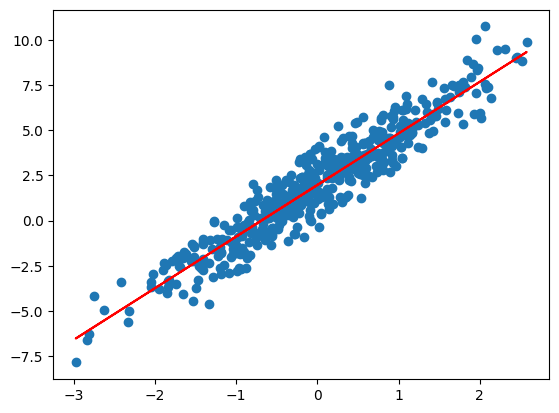

In [19]:
# comparing gpu to cpu time

"""
Run Model Output Key:
0 - weight
1 - bias
2 - total_time
3 - train_steps
4 - y_pred
5 - y_true
6 - x_true
7 - losses
"""

model_1 = run_model(l2_loss,
                    learning_rate = 0.01,
                    train_steps = 1000,
                    init_weight = 2.0,
                    init_bias = 2.0,
                    patience_lim = 50,
                    noise_std = 1.0,
                    weight_noise = 0.01,
                    lr_noise = 0.1,
                    seed = 123456,
                    device = "/GPU:0")

# plot the true data
plt.scatter(model_1[6], model_1[5], label= "True Data")

# plot the predicted line
plt.plot(model_1[6], y_prediction(model_1[0], model_1[6], model_1[1]), 
         label = "Best Hyperparameters", color = "red")

In [ ]:
model_2 = run_model(l2_loss,
                    learning_rate = 0.01,
                    train_steps = 2000,
                    init_weight = 2.0,
                    init_bias = 2.0,
                    patience_lim = 50,
                    noise_std = 1.0,
                    weight_noise = 0.01,
                    lr_noise = 0.1,
                    seed = 123456,
                    device = "/CPU:0")
